In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [105]:
data=pd.read_csv("diabetes.csv")

In [106]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [107]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,120.795306,69.104302,20.504563,79.195567,31.994524,0.472286,33.215124,0.348110
std,3.371117,31.874936,19.368410,15.938104,114.096695,7.889120,0.331351,11.746201,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [108]:
data.shape

(767, 9)

In [109]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [110]:
#GETTING SOME STATS

In [111]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,120.795306,69.104302,20.504563,79.195567,31.994524,0.472286,33.215124,0.348110
std,3.371117,31.874936,19.368410,15.938104,114.096695,7.889120,0.331351,11.746201,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [112]:
data["Outcome"].value_counts()

0    500
1    267
Name: Outcome, dtype: int64

#### 0 ==> Non-Diabetic and 1==> Diabetic 

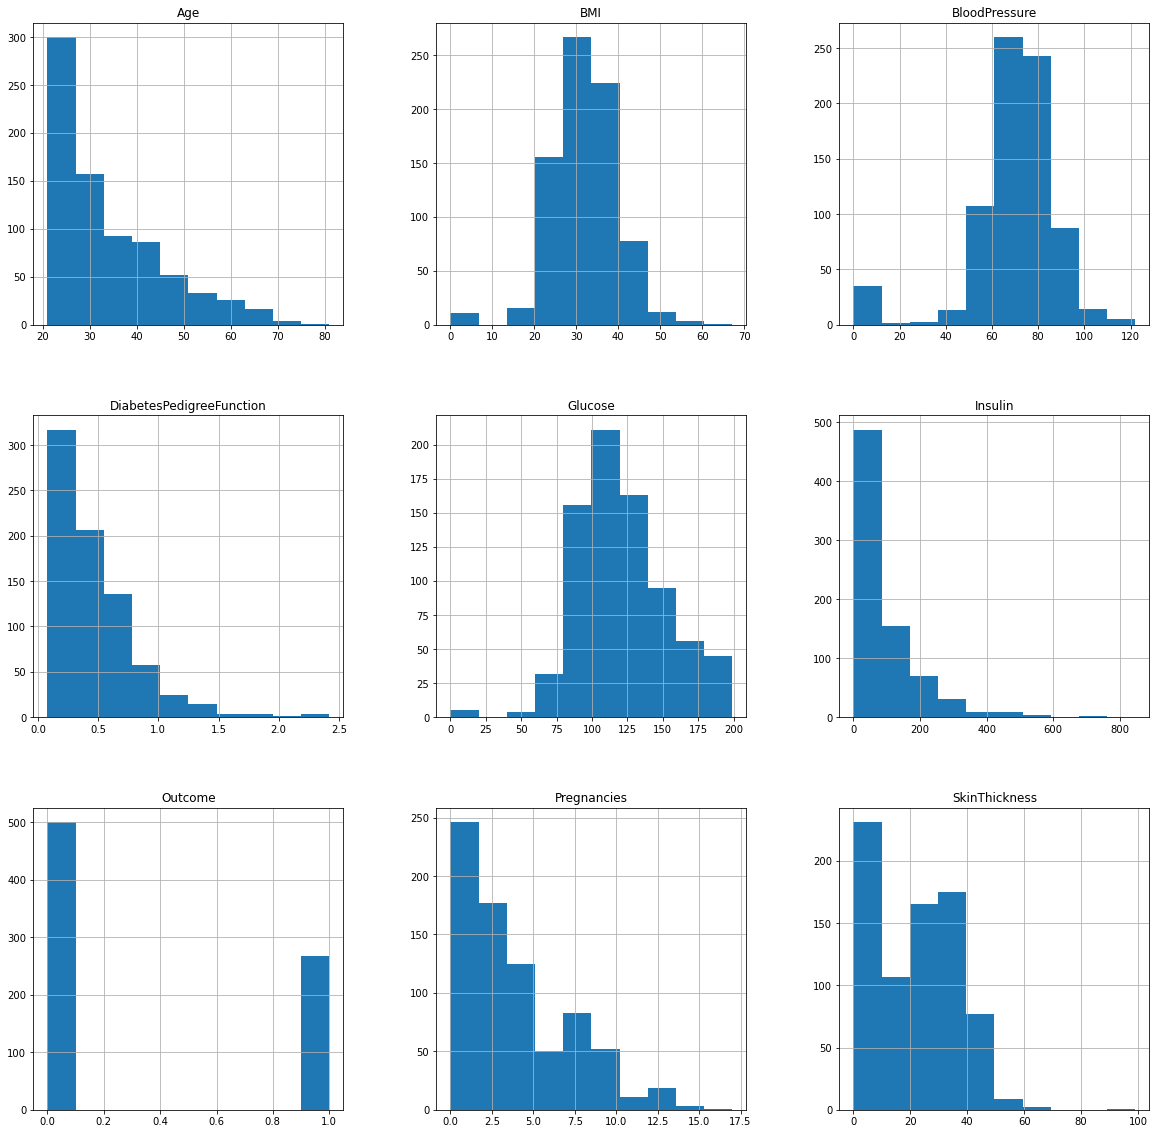

In [113]:
p = data.hist(figsize = (20,20))

In [114]:
data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.876404,141.048689,70.827715,22.078652,98.677903,35.159925,0.551970,37.007491


In [115]:
X=data.drop(columns="Outcome", axis=1)
#axix=1 column drop and axis=1 drop row

In [116]:
y=data["Outcome"]

### Data Standadization 

In [117]:
scaler= StandardScaler()

In [118]:
scaler.fit(X)

StandardScaler()

In [119]:
standardized_data=scaler.transform(X)

In [120]:
print(standardized_data)

[[ 0.63894165  0.85403921  0.14960376 ...  0.20363785  0.46722554
   1.42989452]
 [-0.84521415 -1.12372503 -0.16038116 ... -0.68423904 -0.36627276
  -0.1887052 ]
 [ 1.23260397  1.95279712 -0.26370947 ... -1.10280958  0.603122
  -0.10351574]
 ...
 [ 0.34211049  0.00642596  0.14960376 ... -0.73497487 -0.68638442
  -0.27389466]
 [-0.84521415  0.16339138 -0.47036608 ... -0.2403006  -0.3723126
   1.17432614]
 [-0.84521415 -0.87258036  0.04627545 ... -0.20224873 -0.47498993
  -0.87022087]]


In [121]:
X=standardized_data

In [122]:
#split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [123]:
clf=svm.SVC(kernel="linear")

In [124]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [125]:
#training acc
train_pred=clf.predict(X_train)
accuracy_score(train_pred,y_train)

0.7830342577487766

In [126]:
#testing acc
test_pred=clf.predict(X_test)
accuracy_score(test_pred,y_test)

0.7857142857142857

In [127]:
print(clf.predict([[2,197,70,45,543,30.5,0.158,53]]))  #1

[1]


In [128]:
labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
values=[]